# 길이 25, 무게 150의 물고기가 도미인지, 빙어인지 예측하기

# 1. 데이터 준비

- **도미, 빙어 데이터를 합친 데이터**

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

##### numpy 함수

- `numpy`**함수 이용해서 ndarray 배열 만들기**
    ```np.함수명```
- ```np.zeros()```: 0으로 초기화된 shape 차원의 ndarray 배열 객체 반환
- ```np.ones()```: 1로 초기화
- ```np.empty()```: 초기화하지 않은
- ```np.full()```: 모든 값을 10으로 초기화
- ```np.column_stack(([a, b]))``` : 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들기
- ```np.concatenate((a, b, axis = 0))```: 두 배열을 왼쪽에서 오른쪽으로 붙이기 
- ```np.concatenate((a, b, axis = 1))```: 두 배열을 위에서 아래로 붙이기

**shape은 numpy 행열의 차원을 나타내고, ndarray는 배열 객체를 반환, array는 리스트 객체에 사용**

In [2]:
import numpy as np

fish_data = np.column_stack(([fish_length, fish_weight]))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
                            # 도미 = 0, 빙어 = 1

print(fish_data.shape, fish_target.shape)

(49, 2) (49,)


- **이진분류를 해야하는 타겟값의 경우 numpy 함수를 이용해 1, 0을 설정해줄 수 있다.**

# 2. 데이터 분리
- `train_test_split`에서 `stratify` 매개변수를 조정해서 타겟값 기준 데이터 분리 비율 맞추기

In [3]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(fish_data, fish_target
                                                                    , stratify = fish_target, random_state = 42)
                                    # target(y) 기준으로 stratify 데이터 분리 비율 맞추기
print(train_data.shape, test_data.shape)
print(train_target.shape, test_target.shape)


(36, 2) (13, 2)
(36,) (13,)


# 3. 머신러닝 학습

In [4]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_data, train_target)
print(kn.score(train_data, train_target))
print(kn.score(test_data, test_target))

1.0
1.0


# 4. 수상한 물고기 데이터 예측

In [5]:
print(kn.predict([[25, 150]]))

[0.]


# 5. 데이터 시각화
- **수상한 물고기는 사실 도미인데 빙어라는 예측 결과가 나왔다. KNeighborsClassifier()는 비슷한 특성을 가진 데이터는 비슷한 범주에 속한다는 가정의 분류법이다. 가장 가까운 이웃 데이터를 이용해서 예측하는데 아마도 가장 가까운 이웃 데이터가 빙어로 나왔나보다. 실제로 빙어와 가까운지 Data visualization으로 확인해보면 된다.**

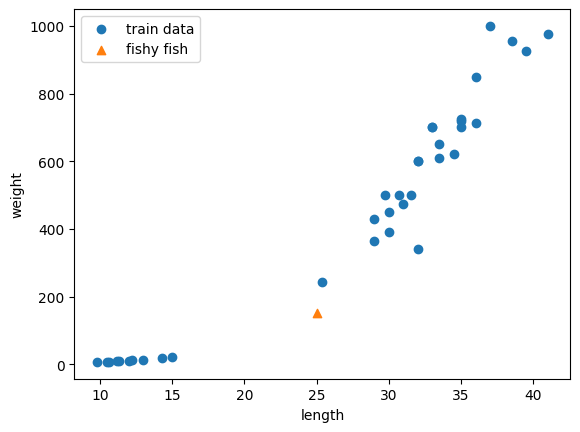

In [6]:
import matplotlib.pyplot as plt

plt.scatter(train_data[:, 0], train_data[:, 1], label ='train data')
plt.scatter(25, 150, marker = '^', label = 'fishy fish')
plt.legend(loc = 0)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- **보기에는 수상한 물고기는 빙어데이터에 가까워보이지 않는다. 더 정확히 보기 위해 가장 가까운 이웃과의 거리와 그 이웃샘플의 인덱스를 얻어서 그래프에 표시해보자.
- ```KNeighborsClassifier().kneighbors()``` **함수를 사용해 distances와 indexes를 반환한다.**
- 가장 가까운 이웃과의 거리와 그 이웃샘플의 인덱스를 얻을 수 있다. `n_neighbor` 매개변수의 default = 5 이기 때문에 5개의 인덱스와 거리가 반환될 것이다.

# 6. 이웃 샘플 찾기

In [7]:
distances, indexes = kn.kneighbors([[25, 150]])
print('distances: ', distances)
print('indexes: ', indexes)

distances:  [[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
indexes:  [[21 33 19 30  1]]


# 7. 데이터 시각화: 이웃 샘플 위치 포함

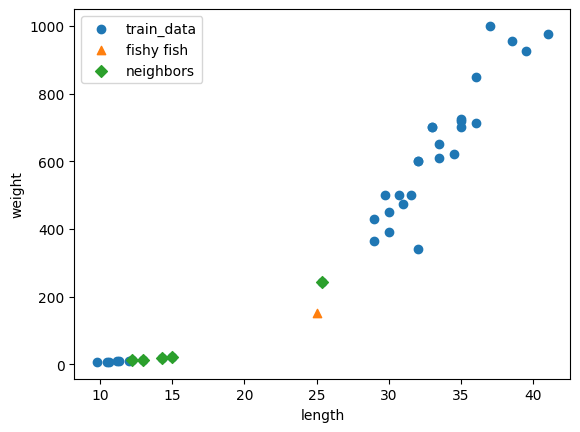

In [8]:
plt.scatter(train_data[:, 0], train_data[:, 1], label = 'train_data')
            # x = 모든 행의 0번째 column(length)에 해당하는 값
            # y =모든 행의 1번째 column(weight)에 해당하는 값
plt.scatter(25, 150, marker = '^', label = 'fishy fish')
plt.scatter(train_data[indexes, 0], train_data[indexes, 1], marker = 'D', label = 'neighbors')
            # x = 해당 index의 'length' column에 해당하는 값
            # y = 해당 index의 'weight' column에 해당하는 값
plt.legend(loc = 0)

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

##### 데이터 전처리의 중요성
- 누가봐도 도미랑 가까운 물고기인데 빙어라고 나온 이유는 가장 가까운 데이터의 물고기 5개 중 4개가 빙어로 나왔기 때문이다. x축과 y축의 범위가 다르면 이런 오류가 생길 수 있다. 따라서, 수치 데이터의 경우 수치 범위를 맞춰주어야 한다.

# 8. 데이터 전처리

## 8-1. 브로드캐스팅: z-score standardization

##### z-점수 표준화
`X_scaled = (X - mean) / std `
- 변수 X의 범위를 평균으로부터 몇 표준편차만큼 떨어져있는지에 따라 변수의 스케일을 확대/축소시키는 방식

In [9]:
mean = np.mean(train_data, axis = 0) # 열의 평균을 구한다
std = np.std(train_data, axis = 0) # 열의 표준편차를 구한다
# axis = 0 행을 따라 열의 통계 값을 계산하겠다
# axis = 1 열을 따라 행의 통계 값을 계산하겠다

In [15]:
train_scaled = (train_data - mean) / std
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

In [20]:
test_scaled = (test_data - mean) / std
test_scaled

array([[-1.63258863, -1.37457062],
       [-1.55244793, -1.37395199],
       [ 0.24070039, -0.01267317],
       [-1.55244793, -1.37364268],
       [-0.07986244, -0.35291555],
       [-1.4923424 , -1.3631261 ],
       [ 0.67145669,  0.71420828],
       [ 0.67145669,  0.3739659 ],
       [ 1.12224816,  1.44108972],
       [ 0.77163257,  0.69874271],
       [-0.09989762, -0.50757117],
       [ 0.37092904,  0.14198246],
       [ 1.37268787,  1.5338831 ]])

In [21]:
fishyfish_scaled = ([25, 150] - mean) / std
fishyfish_scaled

array([-0.23012627, -0.94060693])

## 8-2. 모델 재학습, 정확도 평가

In [22]:
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

1.0
1.0


## 8-3. 이웃 샘플 다시 찾기

In [23]:
kn.predict([fishyfish_scaled]) # 정답: 도미

array([1.])

In [24]:
distances, indexes = kn.kneighbors([fishyfish_scaled])
print('distances: ', distances)
print('indexes:', indexes)

distances:  [[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]]
indexes: [[21 14 34 32  5]]


## 8-4. 데이터 시각화: 이웃 샘플 위치 포함

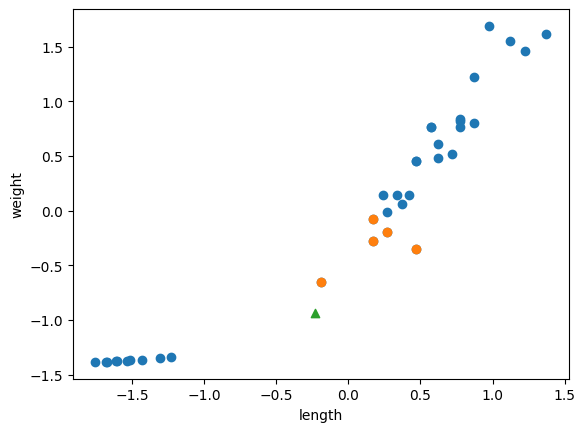

In [25]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], label = 'train_scaled')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], label = 'neighbors')
plt.scatter(fishyfish_scaled[0], fishyfish_scaled[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()